In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Hisse kodları
tickers = ["GOOGL","MSFT","META","AAPL","AMZN"]

#Verileri indirme
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start="2024-01-01", end="2025-01-01")['Close'] #Çalışma kapanış verileriyle yapıldı


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOGL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MSFT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['META']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AMZN']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Her bir şirket için 2024 yılı boyunca ortalama kapanış fiyatını hesaplayın ve bir tablo (DataFrame) oluşturun. (ipucu: mean() fonksiyonunu kullanabilirsiniz)

In [3]:
# Ortalama kapanış fiyatlarını hesapla          
average_close = {}
for ticker in tickers:
    average_close[ticker] = data[ticker].mean()

#Ortalama kapanış fiyatlarını DataFrame'e dönüştür
average_close_df = pd.DataFrame(list(average_close.items()), columns=['Company', 'Average_Close'])

# DataFrame'i göster
average_close_df

,Company,Average_Close
0,GOOGL,Ticker GOOGL NaN dtype: float64
1,MSFT,Ticker MSFT NaN dtype: float64
2,META,Ticker META NaN dtype: float64
3,AAPL,Ticker AAPL NaN dtype: float64
4,AMZN,Ticker AMZN NaN dtype: float64


2024 yılında en yüksek kapanış fiyatına ulaşan şirket ve tarihini bulun. (ipucu: idxmax() kullanarak maksimum değerin tarihini bulabilirsiniz.)

In [ ]:
#2024 yılında en yüksek kapanış fiyatına ulaşan şirket ve tarihi bul
#şirketleri tara ve max kapanış fiyatına bak. max olanı seç.
max_close_info = {}  
for ticker in tickers:
    max_price = data[ticker].max()
    max_date = data[ticker].idxmax()
    max_close_info[ticker] = {'Max Price': max_price, 'Date': max_date}

#Göster
max_close_df = pd.DataFrame(max_close_info).T
max_close_df   

ValueError: attempt to get argmax of an empty sequence

2024 yılında her şirket için:

Yılın ilk kapanış fiyatı ile yılın son kapanış fiyatı arasındaki yüzde değişimi (% değişim) hesaplayın.
Hangi şirketin yatırımcısına en fazla kazanç sağladığını bulun.

In [ ]:
#döngüyle hepsini tara
#son fiyat - ilk fiyat
#idmax() ile max olanı seç

In [ ]:
returns = {}
for ticker in tickers:
    first_price = data[ticker].iloc[0].values[0]
    last_price = data[ticker].iloc[-1].values[0]
    pct_change = ((last_price - first_price) / first_price) * 100
    returns[ticker] = {
        'First Price': first_price,
        'Last Price': last_price,
        'Percent Change': pct_change}
returns_df = pd.DataFrame(returns).T
print(returns_df)  

# En fazla kazanç sağlayan şirket
best_investment = returns_df['Percent Change'].idxmax()
print(f"En fazla kazanç sağlayan şirket: {best_investment}")

IndexError: single positional indexer is out-of-bounds

2024 boyunca her şirket için kapanış fiyatlarını kullanarak 1 aylık hareketli ortalama (moving average) hesaplayıp aynı grafik üzerinde gösteriniz.

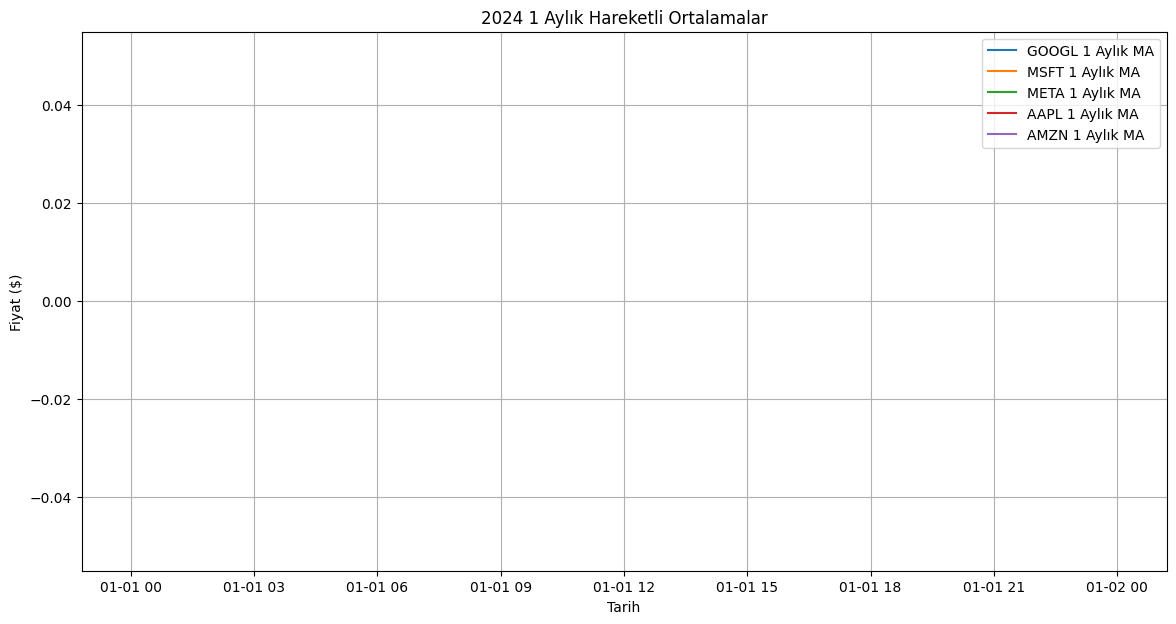

In [ ]:
plt.figure(figsize=(14, 7))  

for ticker in tickers:
    # Kapanış fiyatları üzerinden 1 aylık hareketli ortalama hesapla
    moving_avg = data[ticker].rolling(window=21).mean()
    plt.plot(moving_avg, label=f'{ticker} 1 Aylık MA')  

# Grafik başlıkları ve etiketler
plt.title('2024 1 Aylık Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat ($)')
plt.legend()  
plt.grid(True)  
plt.show()  

Tüm şirketlerin günlük kapanış fiyatlarını kullanarak 2024 yılı için korelasyon matrisini hesaplayın ve yorumlayın. (Bu şirketlerin fiyatları birbirine ne kadar benzer hareket ediyor?) İpucu: corr() fonksiyonunu kullanabilirsiniz.

In [ ]:
# DataFrame'e bütün kapanış fiyatlarını birleştirelim
combined_data = pd.concat(data, axis=1)
combined_data.columns = tickers  # Sütun isimlerini hisse kodlarıyla güncelle

# Korelasyon matrisi
corr_matrix = combined_data.corr()
corr_matrix

,GOOGL,MSFT,META,AAPL,AMZN
GOOGL,1.000000,0.743324,0.557259,0.683679,0.772632
MSFT,0.743324,1.000000,0.610335,0.545477,0.722250
META,0.557259,0.610335,1.000000,0.703936,0.825060
AAPL,0.683679,0.545477,0.703936,1.000000,0.652449
AMZN,0.772632,0.722250,0.825060,0.652449,1.000000


# YORUM
-Diagonal (köşegen) değerler: Her şirketin kendisiyle olan korelasyonu  doğal olarak 1'dir.

-GOOGL ve MSFT (0.743): Google ve Microsoft'un kapanış fiyatları arasında güçlü bir pozitif ilişki vardır.

-META ve AMZN (0.825): Meta ve Amazon'un fiyatları arasında oldukça güçlü bir pozitif ilişki gözlemleniyor.

-AAPL ve MSFT (0.545): Apple ve Microsoft'un fiyatları arasında daha zayıf bir pozitif ilişki var.


# Genel olarak, teknoloji şirketlerinin hisse fiyatlarının birbirine oldukça bağlı olduğu söylenebilir.